In [117]:
# Importando as bibliotecas
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix ,precision_score, recall_score, f1_score, classification_report ,roc_curve, roc_auc_score ,roc_curve, auc, ConfusionMatrixDisplay , RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import xgboost as xgb    
from utils.metrics import *
import seaborn as sns

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
credit_aproval = pd.read_excel('treino.xlsx',index_col=[0])
validation_credit_aproval  = pd.read_excel("teste.xlsx",index_col=[0])

In [119]:
credit_aproval.head() # as variaveis ja sao componentes principais


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
id,,,,,,,,,,,,,,,,,,,,,
1,-0.299468,0.533339,0.592928,0.094916,0.015414,0.019142,0.045814,0.177430,-0.040845,-0.201868,...,-0.006907,0.082039,0.783691,0.046401,-0.181900,0.201659,0.186339,0.052175,0.081669,0
2,0.529493,-0.094837,0.341711,0.568313,-0.318345,0.201856,-0.302414,0.208240,0.290601,-0.005605,...,-0.934574,0.248362,0.231307,-0.121390,0.045858,-0.088862,-0.320489,-0.132945,0.051778,0
3,0.605630,-0.024632,-0.042535,-0.023267,-0.135464,-0.141456,0.093773,-0.093751,-0.586908,0.282549,...,0.681119,-0.082467,-0.037362,-0.923501,0.024895,0.135814,-0.367899,-0.084424,-0.273891,0
4,-0.346173,0.647783,0.473604,-0.165712,0.127780,-0.221239,0.295904,0.076857,-0.220782,-0.110628,...,0.560604,0.001884,0.409169,0.236170,-0.362497,-0.085438,0.210089,0.112295,-0.136954,0
5,0.240050,-0.688908,0.525568,0.434648,-0.371745,0.799044,-0.332958,0.227423,0.783561,-0.423634,...,0.561863,-0.483898,0.041915,-0.616440,0.548586,-0.956886,-0.379454,0.235959,0.035924,0


In [120]:
credit_aproval.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
id,,,,,,,,,,,,,,,,,,,,,
164227,0.945540,-0.636454,-1.891954,-0.694469,1.006394,1.333040,0.075870,0.200967,-0.551412,0.429079,...,-0.062475,0.457187,-0.036584,-1.154964,-0.020712,0.595263,-0.140924,-0.097852,-0.090685,0
164228,0.069862,0.474324,-1.456827,-1.092415,0.941858,-0.528412,0.862812,0.009045,-0.411747,-0.128967,...,-0.035620,0.655400,-0.946454,-0.159390,-0.458698,0.049198,-0.097779,-0.058269,0.245734,0
164229,1.029171,-0.019496,-0.964276,0.165058,0.135064,-0.367832,-0.086939,0.072412,0.424644,-0.068249,...,-1.968847,0.015673,0.014050,0.441783,0.195901,0.503895,0.151688,-0.192415,-0.153320,0
164230,1.039613,-1.081195,-0.892917,-1.402444,0.276423,2.019006,-1.077950,0.511892,-0.432621,0.768096,...,-0.127359,-0.212865,0.332778,-0.168317,0.150983,0.195624,0.018885,-0.095492,0.054955,0
164231,-0.215879,0.649585,-0.285801,-0.580750,0.570882,-0.629435,0.850776,-0.227290,-0.278489,-0.024727,...,0.361352,0.262834,-0.463130,-0.189906,-0.320088,-0.080870,0.017235,0.029066,0.112815,0


In [121]:
credit_aproval.shape

(164231, 22)

In [122]:
credit_aproval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164231 entries, 1 to 164231
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      164231 non-null  float64
 1   V2      164231 non-null  float64
 2   V3      164231 non-null  float64
 3   V4      164231 non-null  float64
 4   V5      164231 non-null  float64
 5   V6      164231 non-null  float64
 6   V7      164231 non-null  float64
 7   V8      164231 non-null  float64
 8   V9      164231 non-null  float64
 9   V10     164231 non-null  float64
 10  V11     164231 non-null  float64
 11  V12     164231 non-null  float64
 12  V13     164231 non-null  float64
 13  V14     164231 non-null  float64
 14  V15     164231 non-null  float64
 15  V16     164231 non-null  float64
 16  V17     164231 non-null  float64
 17  V18     164231 non-null  float64
 18  V19     164231 non-null  float64
 19  V20     164231 non-null  float64
 20  V21     164231 non-null  float64
 21  Class   16

In [123]:
credit_aproval.isna().any()

V1       False
V2       False
V3       False
V4       False
V5       False
V6       False
V7       False
V8       False
V9       False
V10      False
V11      False
V12      False
V13      False
V14      False
V15      False
V16      False
V17      False
V18      False
V19      False
V20      False
V21      False
Class    False
dtype: bool

In [124]:
print(credit_aproval.describe())

                  V1             V2             V3             V4  \
count  164231.000000  164231.000000  164231.000000  164231.000000   
mean        0.020816       0.029036       0.274890       0.023903   
std         0.709996       0.592437       0.580047       0.631710   
min       -14.903862     -19.758520      -9.861436      -2.631825   
25%        -0.445887      -0.296836      -0.048311      -0.398327   
50%        -0.026290       0.023532       0.359776       0.018997   
75%         0.590285       0.422750       0.651813       0.456228   
max         1.215247       8.034236       3.072789       6.134471   

                  V5             V6             V7             V8  \
count  164231.000000  164231.000000  164231.000000  164231.000000   
mean       -0.063158       0.087255      -0.061199       0.081759   
std         0.547314       0.615860       0.414050       0.371658   
min       -18.795629      -8.178917     -10.938095     -14.285038   
25%        -0.422133      -0.3112

<AxesSubplot:>

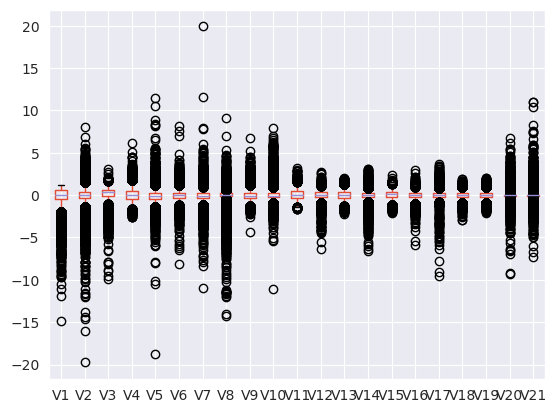

In [125]:
credit_aproval.iloc[:,:-1].boxplot() # muitos outliers

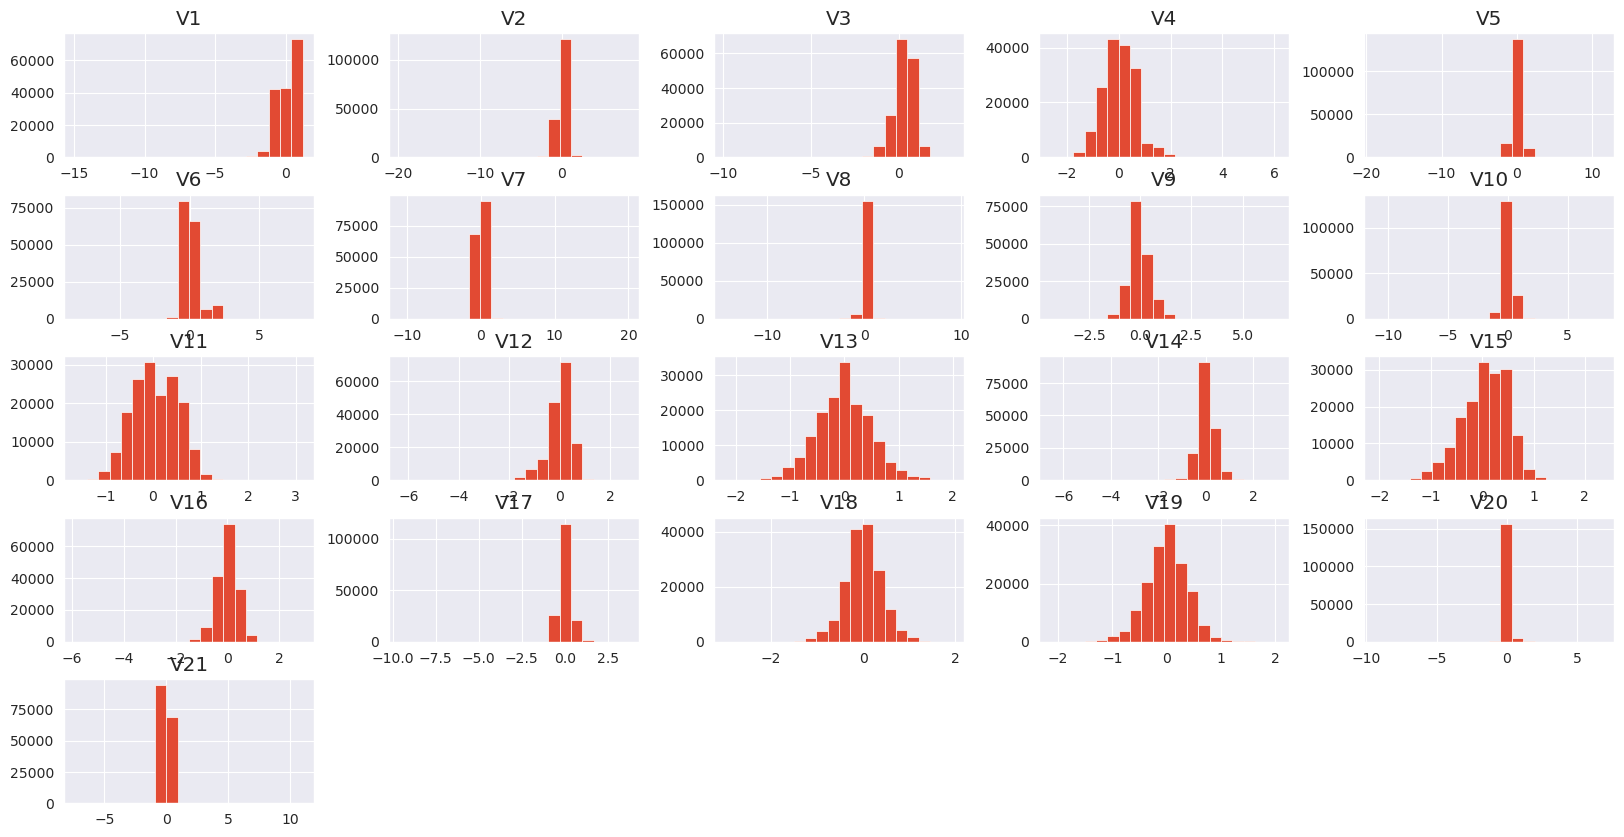

In [126]:
credit_aproval.drop("Class",axis=1).hist(bins=20)
plt.gcf().set_size_inches(20, 10)

In [127]:
credit_aproval['Class'].value_counts()/  credit_aproval.shape[0]

0    0.997851
1    0.002149
Name: Class, dtype: float64

In [128]:

from scipy import stats


for col in credit_aproval.drop("Class",axis=1):
    print("#" *100)
    print(col)
    x = credit_aproval[col].values
    y = credit_aproval['Class'].values

    # Calculate the Point-Biserial Correlation Coefficient
    pb_coeff, p_value = stats.pointbiserialr(x, y)

    print(f"Point-Biserial Correlation Coefficient: {pb_coeff:.4f}")
    print(f"p-value: {p_value:.4f}")


####################################################################################################
V1
Point-Biserial Correlation Coefficient: -0.0364
p-value: 0.0000
####################################################################################################
V2
Point-Biserial Correlation Coefficient: 0.0120
p-value: 0.0000
####################################################################################################
V3
Point-Biserial Correlation Coefficient: -0.0541
p-value: 0.0000
####################################################################################################
V4
Point-Biserial Correlation Coefficient: 0.0283
p-value: 0.0000
####################################################################################################
V5
Point-Biserial Correlation Coefficient: 0.0090
p-value: 0.0003
####################################################################################################
V6
Point-Biserial Correlation Coefficient: -0.0068
p-value: 0.

<AxesSubplot:>

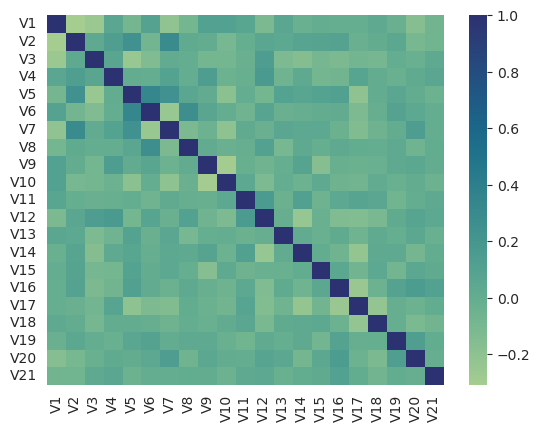

In [129]:
sns.heatmap(credit_aproval.iloc[:,:-1].corr(),cmap="crest") # variaveis sao pouco correlacionadas  entre si

<AxesSubplot:>

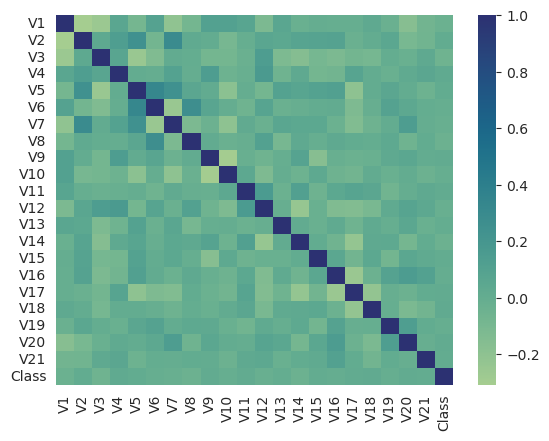

In [130]:
sns.heatmap(credit_aproval.corr(),cmap="crest") # variaveis sao pouco correlacionadas 

In [131]:
credit_aproval

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
id,,,,,,,,,,,,,,,,,,,,,
1,-0.299468,0.533339,0.592928,0.094916,0.015414,0.019142,0.045814,0.177430,-0.040845,-0.201868,...,-0.006907,0.082039,0.783691,0.046401,-0.181900,0.201659,0.186339,0.052175,0.081669,0
2,0.529493,-0.094837,0.341711,0.568313,-0.318345,0.201856,-0.302414,0.208240,0.290601,-0.005605,...,-0.934574,0.248362,0.231307,-0.121390,0.045858,-0.088862,-0.320489,-0.132945,0.051778,0
3,0.605630,-0.024632,-0.042535,-0.023267,-0.135464,-0.141456,0.093773,-0.093751,-0.586908,0.282549,...,0.681119,-0.082467,-0.037362,-0.923501,0.024895,0.135814,-0.367899,-0.084424,-0.273891,0
4,-0.346173,0.647783,0.473604,-0.165712,0.127780,-0.221239,0.295904,0.076857,-0.220782,-0.110628,...,0.560604,0.001884,0.409169,0.236170,-0.362497,-0.085438,0.210089,0.112295,-0.136954,0
5,0.240050,-0.688908,0.525568,0.434648,-0.371745,0.799044,-0.332958,0.227423,0.783561,-0.423634,...,0.561863,-0.483898,0.041915,-0.616440,0.548586,-0.956886,-0.379454,0.235959,0.035924,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164227,0.945540,-0.636454,-1.891954,-0.694469,1.006394,1.333040,0.075870,0.200967,-0.551412,0.429079,...,-0.062475,0.457187,-0.036584,-1.154964,-0.020712,0.595263,-0.140924,-0.097852,-0.090685,0
164228,0.069862,0.474324,-1.456827,-1.092415,0.941858,-0.528412,0.862812,0.009045,-0.411747,-0.128967,...,-0.035620,0.655400,-0.946454,-0.159390,-0.458698,0.049198,-0.097779,-0.058269,0.245734,0
164229,1.029171,-0.019496,-0.964276,0.165058,0.135064,-0.367832,-0.086939,0.072412,0.424644,-0.068249,...,-1.968847,0.015673,0.014050,0.441783,0.195901,0.503895,0.151688,-0.192415,-0.153320,0


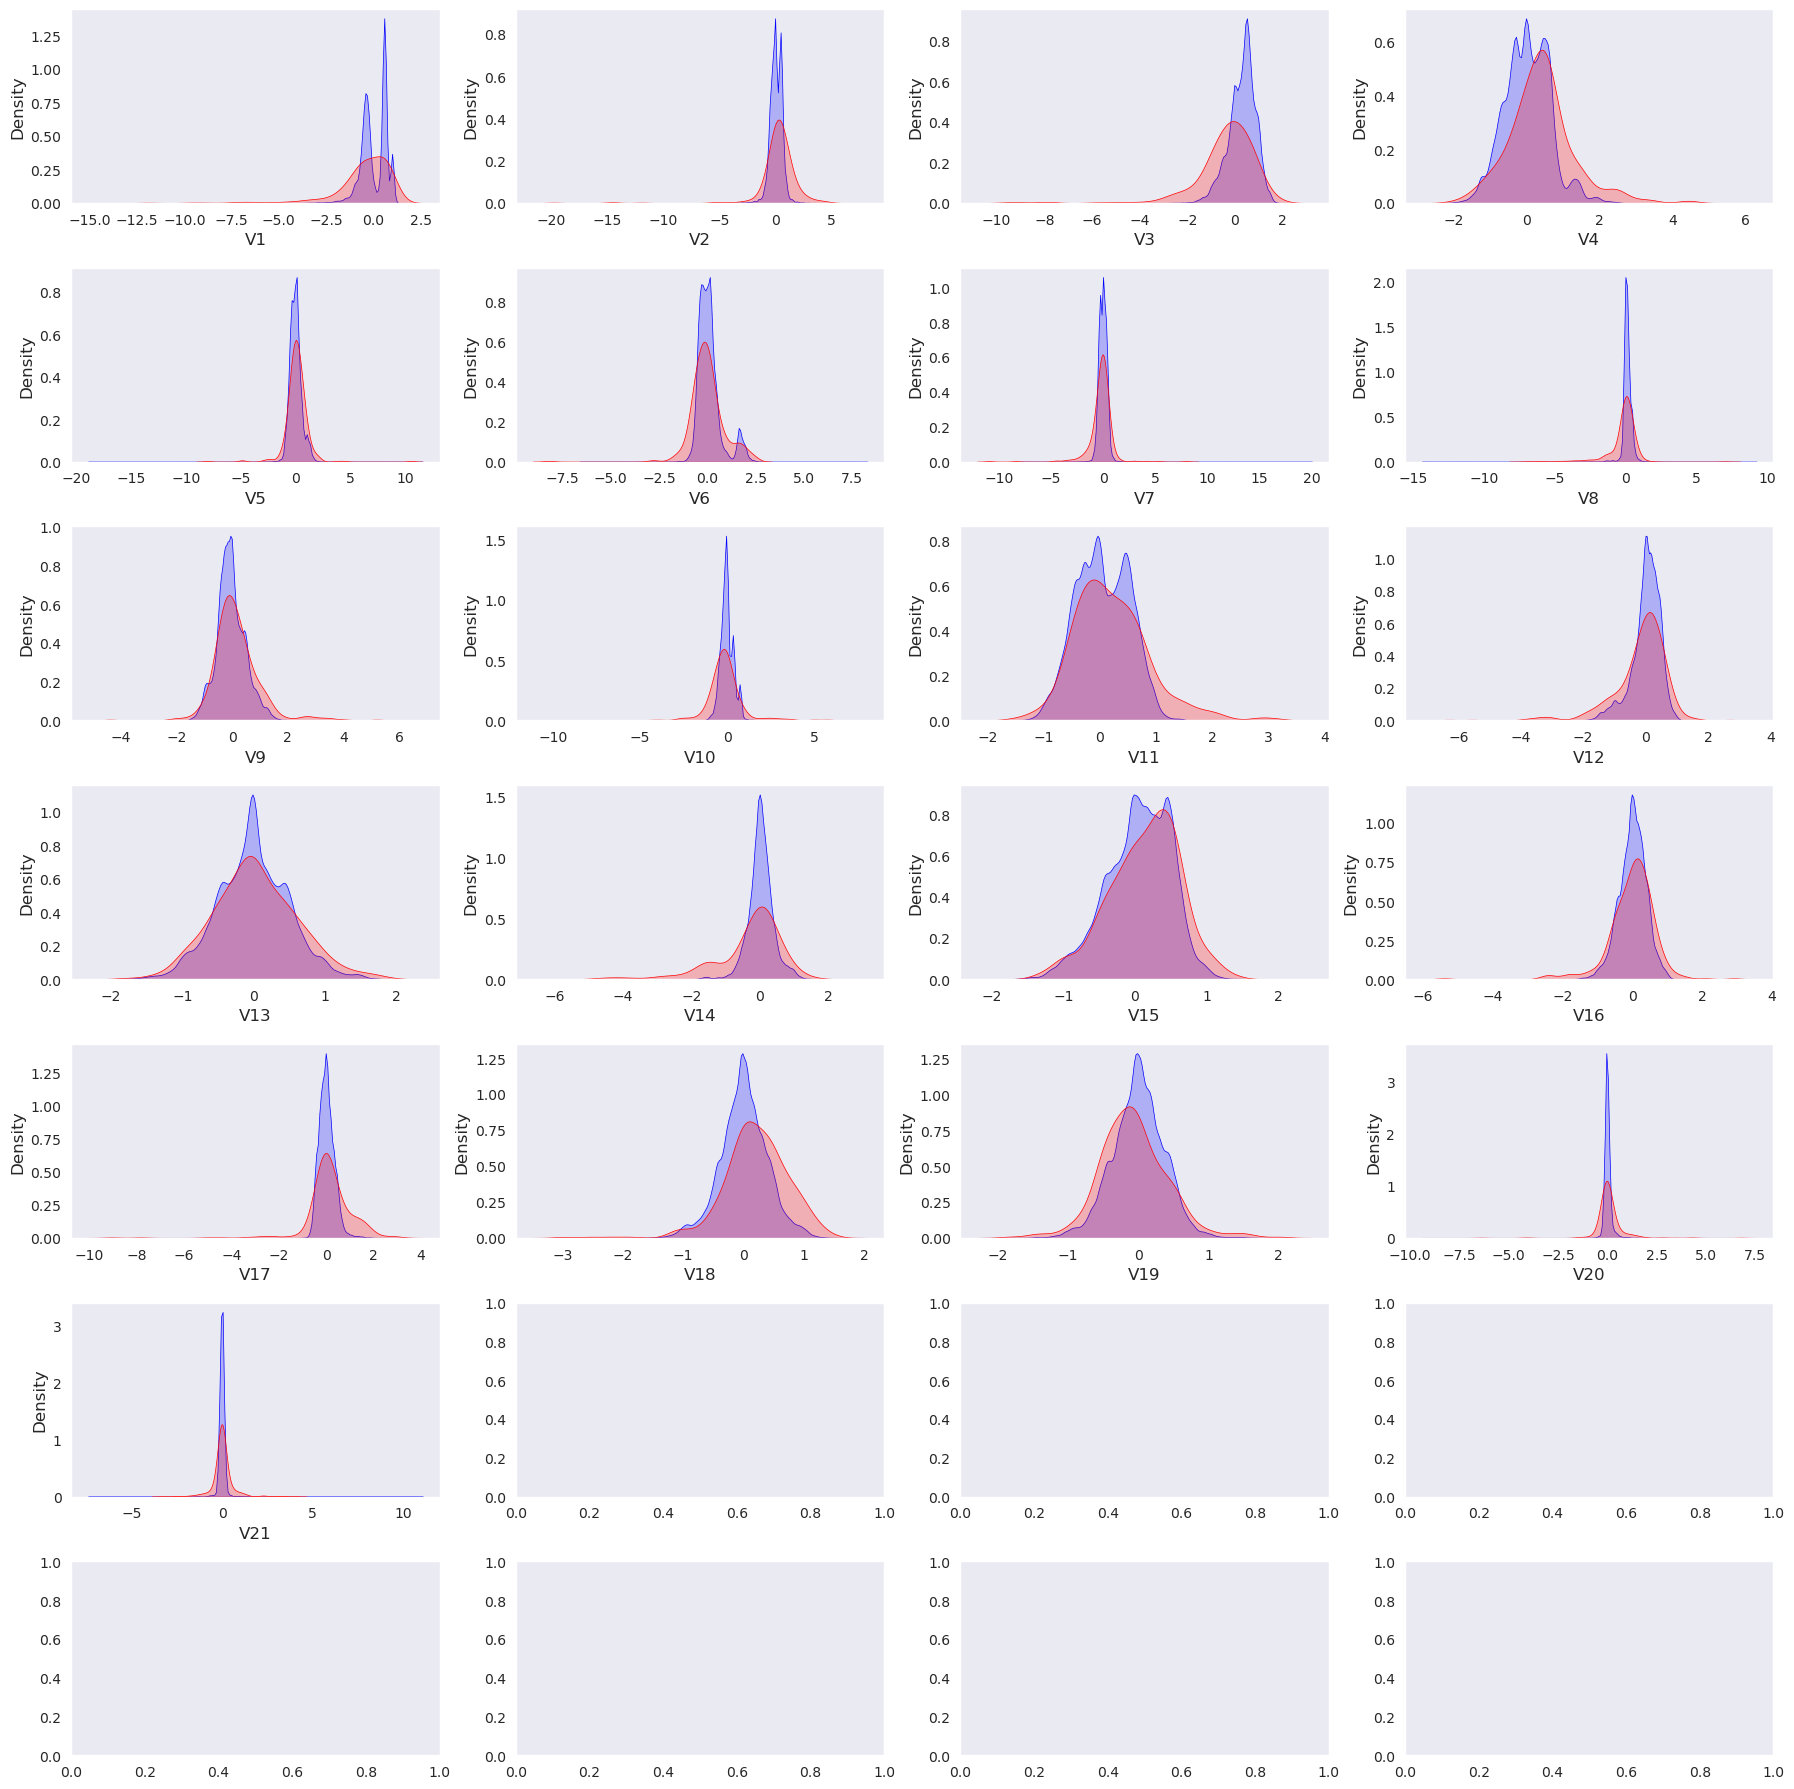

In [132]:
# configurações adicionais
plt.style.use('ggplot')
sns.set_style('dark')

# plotar gráfico de densidade
## criar variável com as colunas PCA (V1, V2, V3, ..., V28)
pca_columns = credit_aproval.drop(['Class'], axis=1).columns

## segmentar transações legítimas e fraudulentas
class_0 = credit_aproval[credit_aproval.Class == 0]
class_1 = credit_aproval[credit_aproval.Class == 1]

# configurar gráfico
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

# loop para plotar todas as 28 variáveis
idx = 0
for col in pca_columns:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(class_0[col], shade=True, color='b')
    sns.kdeplot(class_1[col], shade=True, color='r')

plt.tight_layout()

----------

# Logistc Regression



## Simple Logit:

- Sem realizar downsampling ou upsampling

In [ ]:
X = credit_aproval.drop("Class", axis = 1)
y = credit_aproval["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)


In [ ]:
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])

test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])

# check the proportions
print(train_1/y_train.shape[0]) 
print(test_1/y_test.shape[0])

0.001997190942820261
0.0026060694627112863


In [ ]:
logReg_v1 = LogisticRegression(class_weight='balanced')
logReg_v1.fit(X_train,y_train)
y_pred_train =  logReg_v1.predict(X_train)
y_pred_test =  logReg_v1.predict(X_test)

y_pred_train_proba =  logReg_v1.predict_proba(X_train)
y_pred_test_proba =  logReg_v1.predict_proba(X_test)

In [ ]:
y_pred_test_proba[:, 1]

array([0.277054  , 0.1939308 , 0.68350489, ..., 0.23895591, 0.06430513,
       0.35910797])

In [ ]:
# Calculando a ROC e o Gini - Treinamento
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train_proba[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

print("AUC - Treinamento : %f" % roc_auc_train)
print("Gini - Treinamento: ", round(2*roc_auc_train-1,2))
print("\n")

# Calculando a ROC e o Gini - Teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test_proba[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

print("AUC - Teste : %f" % roc_auc_test)
print("Gini - Teste: ", round(2*roc_auc_test-1,2))

AUC - Treinamento : 0.825244
Gini - Treinamento:  0.65


AUC - Teste : 0.806607
Gini - Teste:  0.61


In [ ]:
def get_metrics(model,y_true,X_true):
    y_pred =  model.predict(X_true)
    y_pred_proba =  model.predict_proba(X_true)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:, 1] )
    auc = roc_auc_score(y_true, y_pred_proba[:, 1] )
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    metrics = {
        'Accuracy' : accuracy,
        'Precision' : precision,
        'Recall' : recall,
        'F1-Score' : f1,
        'False Positive Ratio': fpr,
        'True Positive Ratio':tpr,
        'Thresholds':thresholds,
        'Area Under the Curve': auc,
        "Gini": round(2*auc-1,2),
        'Confussion Matrix' : cm,
        'Classification Report' : report

    }

    

    return metrics



In [ ]:
def  display_metrics(train_metrics_report,test_metrics_report,not_show=['Confussion Matrix','Classification Report','False Positive Ratio','True Positive Ratio','Thresholds']):
    for k in train_metrics_report.keys():
        if k not in not_show:
            print(k, " - Train : ", round(train_metrics_report[k],4))
            print(k, " - Test : ", round(test_metrics_report[k],4))
            print("-"*100)


In [ ]:
train_metrics = get_metrics(logReg_v1,y_train,X_train)
test_metrics = get_metrics(logReg_v1,y_test,X_test)

In [ ]:
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  0.8235
Accuracy  - Test :  0.8253
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.0074
Precision  - Test :  0.0093
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.6585
Recall  - Test :  0.6262
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.0147
F1-Score  - Test :  0.0183
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.8252
Area Under the Curve  - Test :  0.8066
----------------------------------------------------------------------------------------------------
Gini  - Train :  0.65
Gini  - Test :  0.61
----------------------------------------------------------------------------------------------------


In [ ]:
from matplotlib import pyplot as plt
def plot_classification_metrics(model,y_true,X_true):
    y_pred =  model.predict(X_true)
    fig, (ax1, ax2)= plt.subplots(1,2, figsize=(12, 6))
    RocCurveDisplay.from_estimator(model, X_true, y_true).plot(ax=ax2)

    ax2.plot([0,1],[0,1],'k--',label='Benchmark')
    ax2.set_title('ROC Curve Prediction')
    ax2.legend()
    
    conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
    ConfusionMatrixDisplay(confusion_matrix = conf_matrix).plot(ax=ax1)
    ax1.set_title('Matrix Curve')

    plt.close()


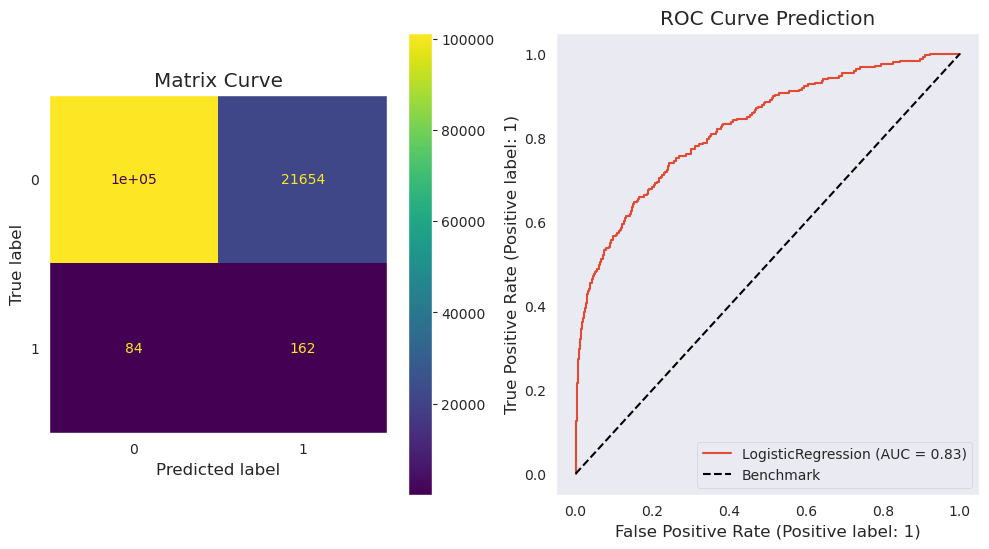

In [ ]:
plot_classification_metrics(logReg_v1,y_train,X_train)

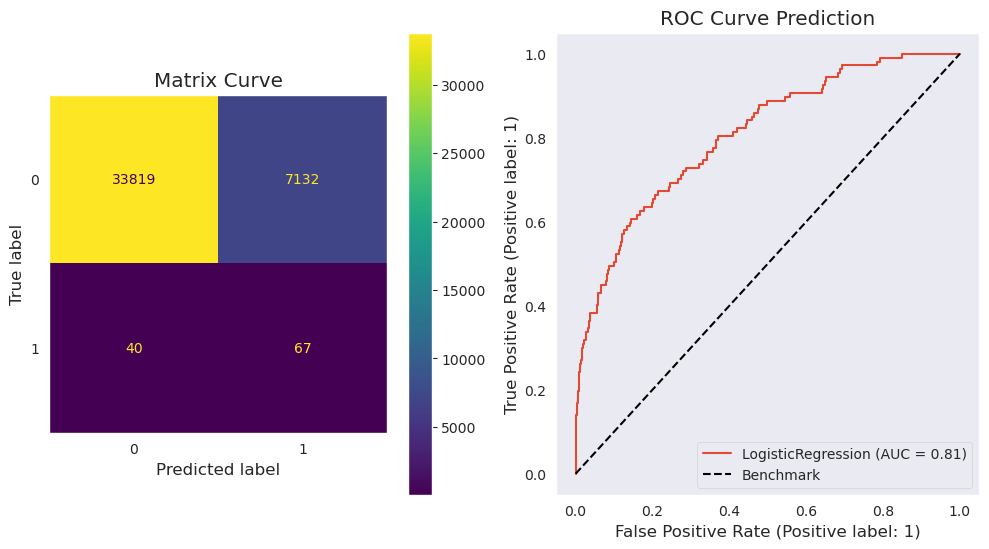

In [ ]:
plot_classification_metrics(logReg_v1,y_test,X_test)

## Grid search Logistc Regression

In [147]:


pipe_lr = make_pipeline(LogisticRegression(class_weight='balanced'))

strat_kfold = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


auc_scores = cross_val_score(estimator=pipe_lr, X=X, y=y,cv=strat_kfold,n_jobs=-1,scoring='roc_auc')


# Print the AUC scores for each fold
print('AUC scores:', auc_scores)

# Compute the mean AUC score across all folds
mean_auc = auc_scores.mean()
print('Mean AUC:', mean_auc)

AUC scores: [0.73819258 0.84887897 0.79111894 0.76563688 0.7950992  0.78288295
 0.87913107 0.82606437 0.80396215 0.80779649]
Mean AUC: 0.8038763594727202


In [ ]:
X = credit_aproval.drop("Class", axis = 1)
y = credit_aproval["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, random_state = 42)



strat_kfold = StratifiedKFold(n_splits=10, shuffle=False)

params_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}



# Step 2: Perform cross-validation with hyperparameter tuning
grid_search_log_reg = GridSearchCV(LogisticRegression(class_weight='balanced',solver='liblinear',random_state = 42), params_log_reg, cv=strat_kfold, scoring='roc_auc',n_jobs=-1)
grid_search_log_reg.fit(X_train, y_train)

best_log_reg = grid_search_log_reg.best_estimator_

best_log_reg.fit(X_train, y_train)

train_metrics = get_metrics(best_log_reg,y_train,X_train)
test_metrics = get_metrics(best_log_reg,y_test,X_test)

In [ ]:
grid_search_log_reg.cv_results_['mean_test_score']

array([0.80187052, 0.80521842, 0.80628428, 0.80643241, 0.80657193,
       0.80664227, 0.80667549, 0.80668072, 0.80668239, 0.80668114,
       0.80668163, 0.80668164, 0.8066814 , 0.8066814 ])

In [ ]:
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  0.82
Accuracy  - Test :  0.8231
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.0075
Precision  - Test :  0.0101
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.6678
Recall  - Test :  0.6286
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.0148
F1-Score  - Test :  0.0198
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.8252
Area Under the Curve  - Test :  0.806
----------------------------------------------------------------------------------------------------
Gini  - Train :  0.65
Gini  - Test :  0.61
----------------------------------------------------------------------------------------------------


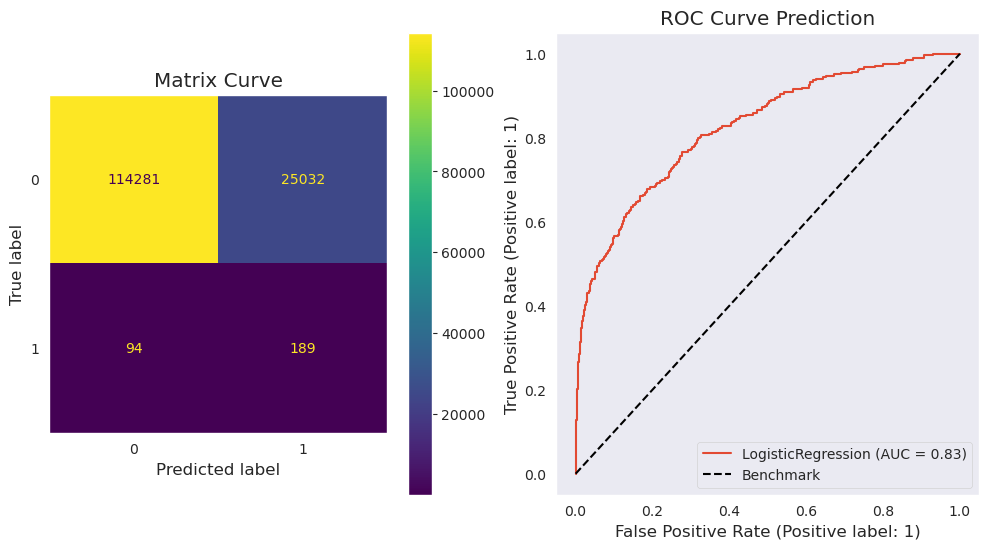

In [ ]:
plot_classification_metrics(best_log_reg,y_train,X_train)

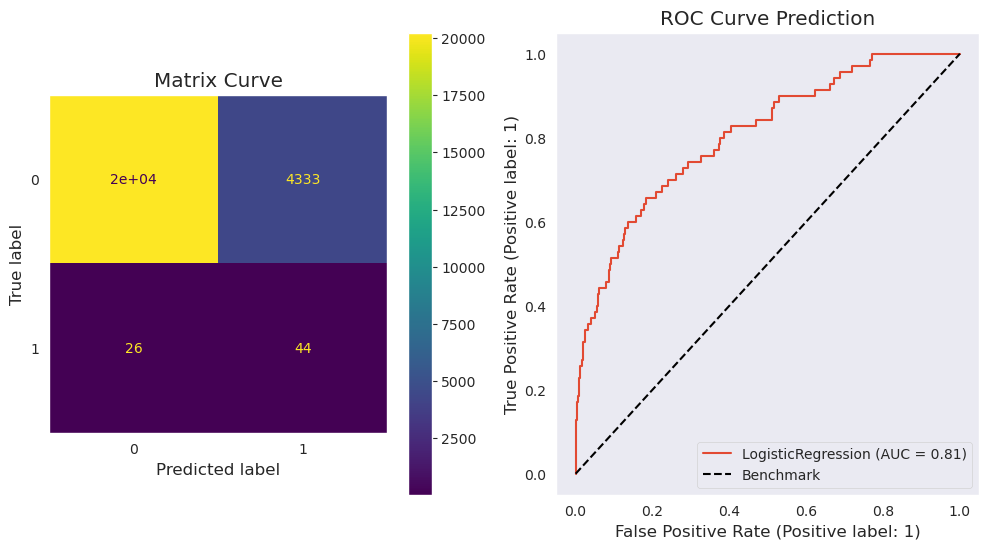

In [ ]:
plot_classification_metrics(best_log_reg,y_test,X_test)

--------------------

## Dealing Data Proportions

* Oversampling (upsampling)

In [ ]:
X = credit_aproval.drop("Class", axis = 1)
y = credit_aproval["Class"]

X_train, X_test, y_train, y_test = train_test_split(X , y, train_size = 0.85,stratify=y ,random_state = 42)

df_resample = pd.concat([X_train,y_train],axis=1)
df_resample.columns = credit_aproval.columns

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 



df_majority = df_resample[(df_resample['Class']==0)] 
df_minority = df_resample[(df_resample['Class']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=df_resample[df_resample['Class'] == 0].shape[0],# to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
df_upsampled ['Class'].value_counts()

1    139296
0    139296
Name: Class, dtype: int64

In [ ]:
X_upsamp = df_upsampled.drop("Class", axis = 1)
y_upsamp = df_upsampled ["Class"]



strat_kfold = StratifiedKFold(n_splits=10, shuffle=False)

params_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}



# Step 2: Perform cross-validation with hyperparameter tuning
grid_search_log_reg = GridSearchCV(LogisticRegression(class_weight='balanced',solver='liblinear'), params_log_reg, cv=strat_kfold, scoring='roc_auc',n_jobs=-1)
grid_search_log_reg.fit(X_upsamp , y_upsamp )

best_log_reg = grid_search_log_reg.best_estimator_
best_log_reg.fit(X_upsamp , y_upsamp )

train_metrics = get_metrics(best_log_reg,y_upsamp ,X_upsamp )
test_metrics = get_metrics(best_log_reg,y_test,X_test)




In [ ]:
grid_search_log_reg.cv_results_['mean_test_score']

array([0.81553446, 0.81767091, 0.81807258, 0.81833104, 0.81839687,
       0.81841551, 0.81842237, 0.81842376, 0.81842436, 0.8184255 ,
       0.81842413, 0.81842517, 0.81842548, 0.81842522])

In [ ]:
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  0.7413
Accuracy  - Test :  0.8152
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.7843
Precision  - Test :  0.0081
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.6657
Recall  - Test :  0.6981
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.7201
F1-Score  - Test :  0.016
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.8185
Area Under the Curve  - Test :  0.8485
----------------------------------------------------------------------------------------------------
Gini  - Train :  0.64
Gini  - Test :  0.7
----------------------------------------------------------------------------------------------------


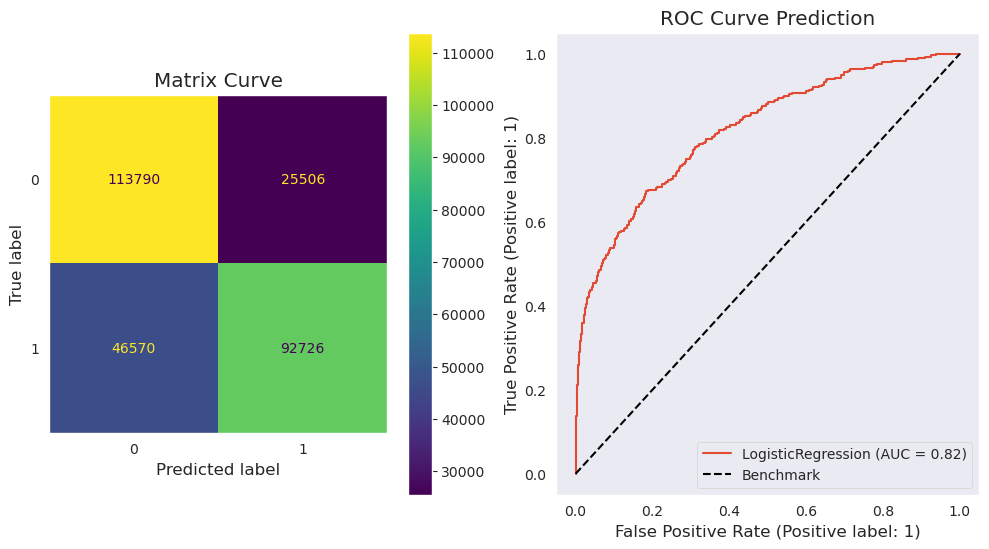

In [ ]:
plot_classification_metrics(best_log_reg,y_upsamp,X_upsamp)

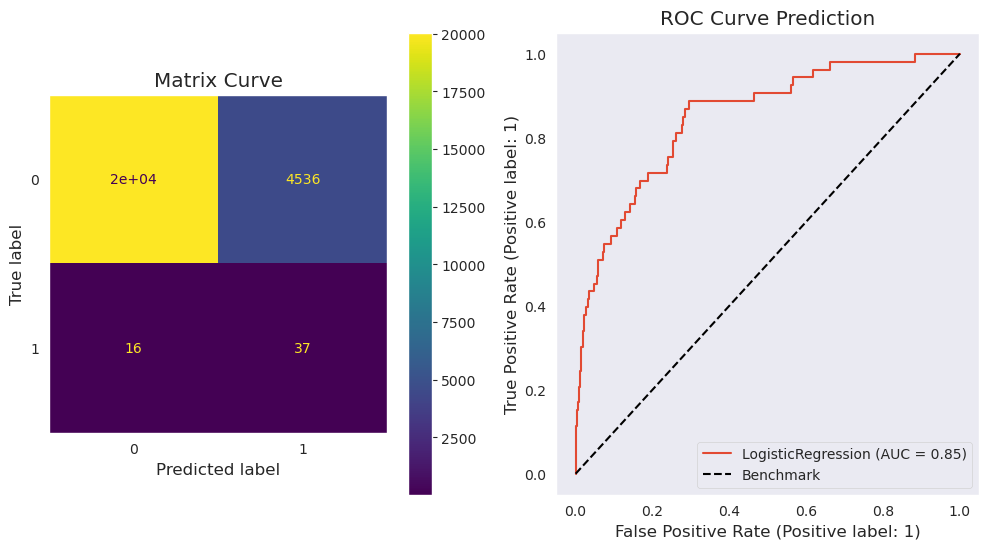

In [ ]:
plot_classification_metrics(best_log_reg,y_test,X_test)

In [ ]:
df_train = pd.concat([X_train,y_train],axis=1)

* SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
#

X = credit_aproval.drop("Class", axis = 1)
y = credit_aproval["Class"]

X_train, X_test, y_train, y_test = train_test_split(X , y, train_size = 0.85,stratify=y ,random_state = 42)

df_train = pd.concat([X_train,y_train],axis=1)
df_train.columns = credit_aproval.columns

#  Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_y = sm.fit_resample(df_train.drop('Class', axis=1), df_train['Class'])
oversampled_complete = pd.concat([pd.DataFrame(oversampled_y), pd.DataFrame(oversampled_X)], axis=1)

strat_kfold = StratifiedKFold(n_splits=10, shuffle=False)

params_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}



# Step 2: Perform cross-validation with hyperparameter tuning
grid_search_log_reg = GridSearchCV(LogisticRegression(class_weight='balanced',solver='liblinear'), params_log_reg, cv=strat_kfold, scoring='roc_auc',n_jobs=-1)
grid_search_log_reg.fit(oversampled_X , oversampled_y )

best_log_reg = grid_search_log_reg.best_estimator_
best_log_reg.fit(oversampled_X , oversampled_y )

train_metrics = get_metrics(best_log_reg,oversampled_y ,oversampled_X )
test_metrics = get_metrics(best_log_reg,y_test,X_test)



In [ ]:
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  0.7151
Accuracy  - Test :  0.7835
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.7487
Precision  - Test :  0.0073
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.6475
Recall  - Test :  0.7358
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.6944
F1-Score  - Test :  0.0144
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.815
Area Under the Curve  - Test :  0.8477
----------------------------------------------------------------------------------------------------
Gini  - Train :  0.63
Gini  - Test :  0.7
----------------------------------------------------------------------------------------------------


In [ ]:
print(test_metrics['Classification Report'])

              precision    recall  f1-score   support

           0       1.00      0.78      0.88     24582
           1       0.01      0.74      0.01        53

    accuracy                           0.78     24635
   macro avg       0.50      0.76      0.45     24635
weighted avg       1.00      0.78      0.88     24635



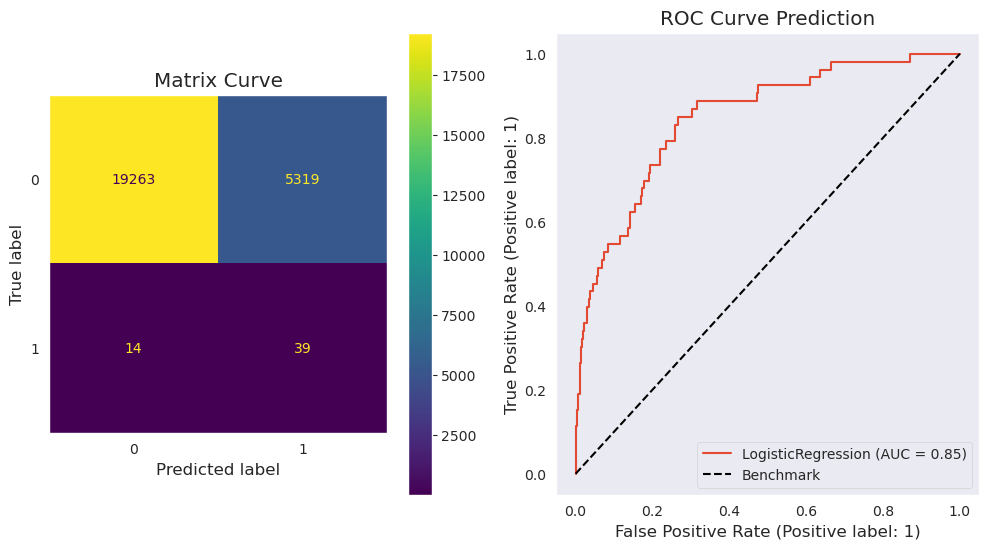

In [ ]:
plot_classification_metrics(best_log_reg,y_test,X_test)

*

In [ ]:
# separar variáveis independentes da variável dependente
X = credit_aproval.drop('Class', axis=1)
y = credit_aproval['Class']

# dividir dados de treino e de teste
## stratify= y (para dividir de forma que as classes tenham a mesma proporção)
## random_state para que o resultado seja replicável
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    stratify=y, shuffle=True,
                                                    random_state=110)

In [ ]:
X_train.shape

(114961, 21)

In [ ]:
X_test.shape

(49270, 21)

## Adding Normalization

In [ ]:
from utils.metrics import *

In [ ]:

from sklearn.preprocessing import StandardScaler

X = credit_aproval.drop("Class", axis = 1)
y = credit_aproval["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, random_state = 42)



strat_kfold = StratifiedKFold(n_splits=10, shuffle=False)

params_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}

pipe_lr = make_pipeline(StandardScaler(), 
                    GridSearchCV(LogisticRegression(class_weight='balanced',solver='liblinear',random_state = 42),
                                 param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                                             'penalty': ['l1', 'l2']},
                                 cv=strat_kfold ,
                                 scoring='roc_auc',
                                 n_jobs=-1,
                                 refit=True #refit with the best model
                                 ))






strat_kfold = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)



pipe_lr.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                              estimator=LogisticRegression(class_weight='balanced',
                                                           random_state=42,
                                                           solver='liblinear'),
                              n_jobs=-1,
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                1000],
                                          'penalty': ['l1', 'l2']},
                              scoring='roc_auc'))])

In [ ]:
def get_metrics(model,y_true,X_true):
    y_pred =  model.predict(X_true)
    y_pred_proba =  model.predict_proba(X_true)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:,-1] )
    auc = roc_auc_score(y_true, y_pred_proba[:,-1] )
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    metrics = {
        'Accuracy' : accuracy,
        'Precision' : precision,
        'Recall' : recall,
        'F1-Score' : f1,
        'False Positive Ratio': fpr,
        'True Positive Ratio':tpr,
        'Thresholds':thresholds,
        'Area Under the Curve': auc,
        "Gini": round(2*auc-1,2),
        'Confussion Matrix' : cm,
        'Classification Report' : report

    }

    return metrics

In [ ]:
train_metrics = get_metrics(pipe_lr,y_train,X_train)
test_metrics = get_metrics(pipe_lr,y_test,X_test)

In [ ]:
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  0.818
Accuracy  - Test :  0.8204
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.0074
Precision  - Test :  0.0097
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.6643
Recall  - Test :  0.6143
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.0146
F1-Score  - Test :  0.0191
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.8227
Area Under the Curve  - Test :  0.7997
----------------------------------------------------------------------------------------------------
Gini  - Train :  0.65
Gini  - Test :  0.6
----------------------------------------------------------------------------------------------------


In [ ]:
test_metrics['Confussion Matrix']

array([[20167,  4398],
       [   27,    43]])

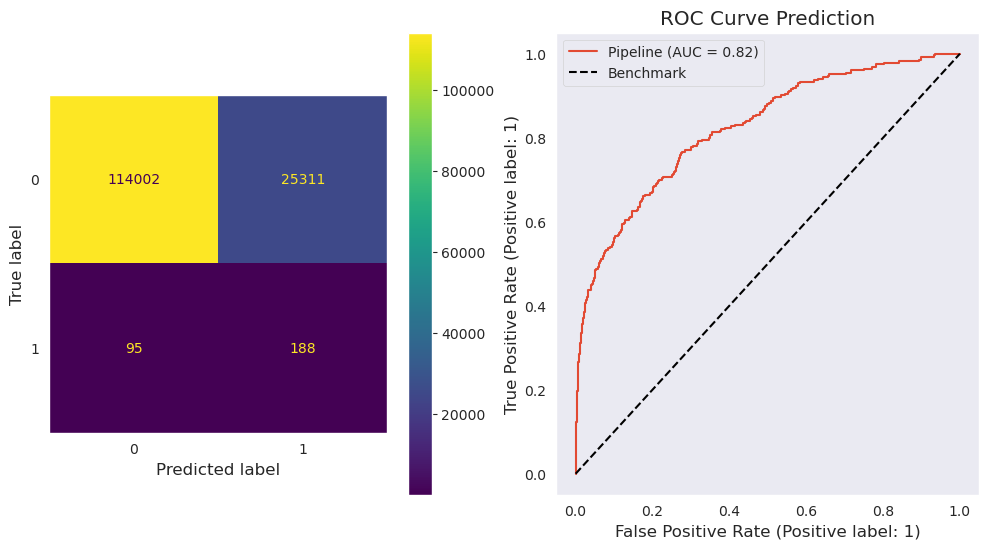

In [ ]:
plot_classification_metrics(pipe_lr,y_train,X_train)

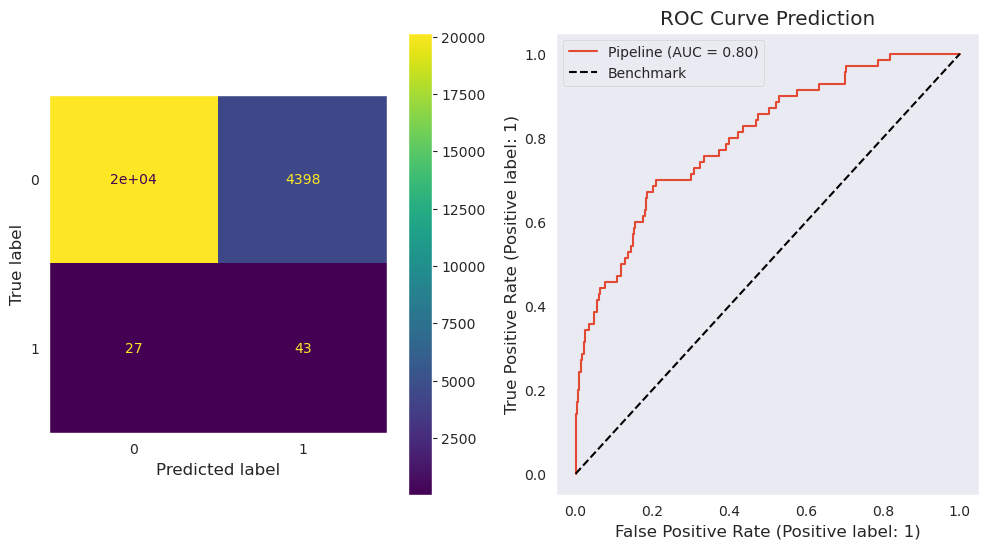

In [ ]:
plot_classification_metrics(pipe_lr,y_test,X_test)

__________

# XGBoost



## Simple XGBoost

In [ ]:
import xgboost as xgb    

# separar variáveis independentes da variável dependente
X = credit_aproval.drop('Class', axis=1)
y = credit_aproval['Class']

# dividir dados de treino e de teste

## stratify= y (para dividir de forma que as classes tenham a mesma proporção)
## random_state para que o resultado seja replicável
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    stratify=y, shuffle=True,
                                                    random_state=42)



xgb_cl = xgb.XGBClassifier(objective = "binary:logistic", n_estimators = 45, seed = 42, scale_pos_weight = 10)
avaliacao = [(X_train, y_train), (X_test, y_test)]

xgb_cl.fit(X_train, y_train, eval_metric = ["auc"], eval_set = avaliacao, verbose = True)
resultados_mod = xgb_cl.evals_result()

# Prediçoes para o treinamento e teste

y_pred_train1 = xgb_cl.predict(X_train)
y_pred_test1 = xgb_cl.predict(X_test)

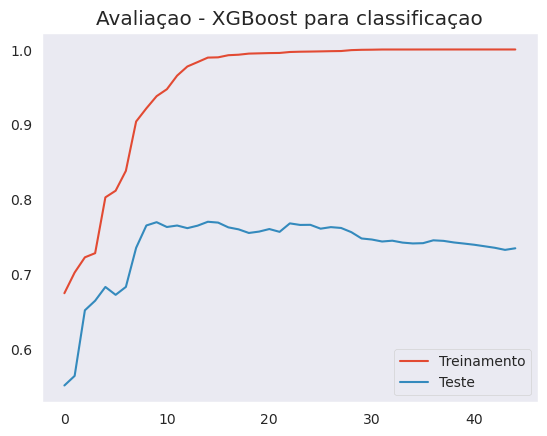

In [ ]:
# Verificando o grafico de avaliaçao

x = len(resultados_mod["validation_0"]["auc"])
X_axis = range(0, x)
fig, ax = plt.subplots()
ax.plot(X_axis, resultados_mod["validation_0"]["auc"], label = "Treinamento")
ax.plot(X_axis, resultados_mod["validation_1"]["auc"], label = "Teste")
plt.title("Avaliaçao - XGBoost para classificaçao");
plt.legend(loc = "lower right");

In [ ]:
train_metrics = get_metrics(xgb_cl,y_train,X_train)
test_metrics = get_metrics(xgb_cl,y_test,X_test)
display_metrics(train_metrics,test_metrics)

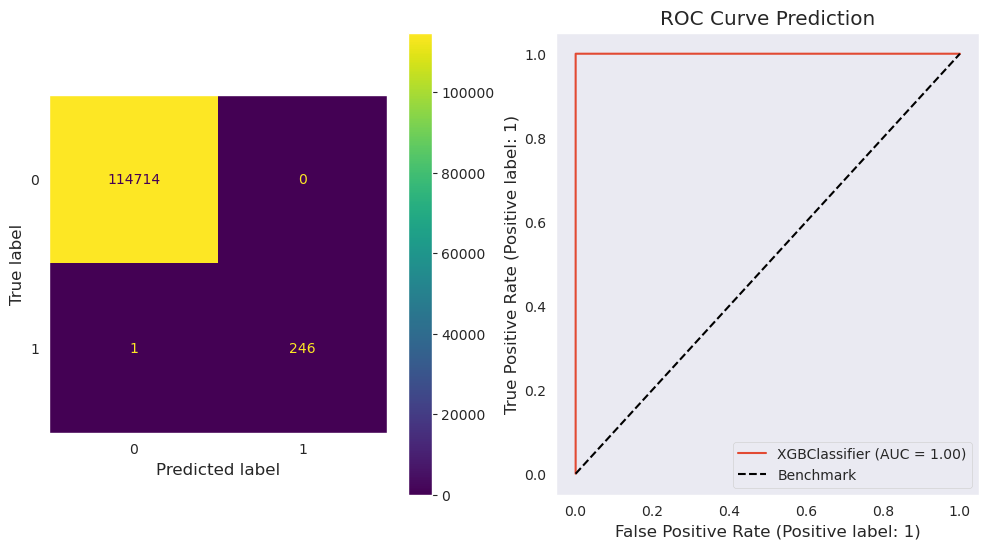

In [ ]:
plot_classification_metrics(xgb_cl,y_train,X_train)

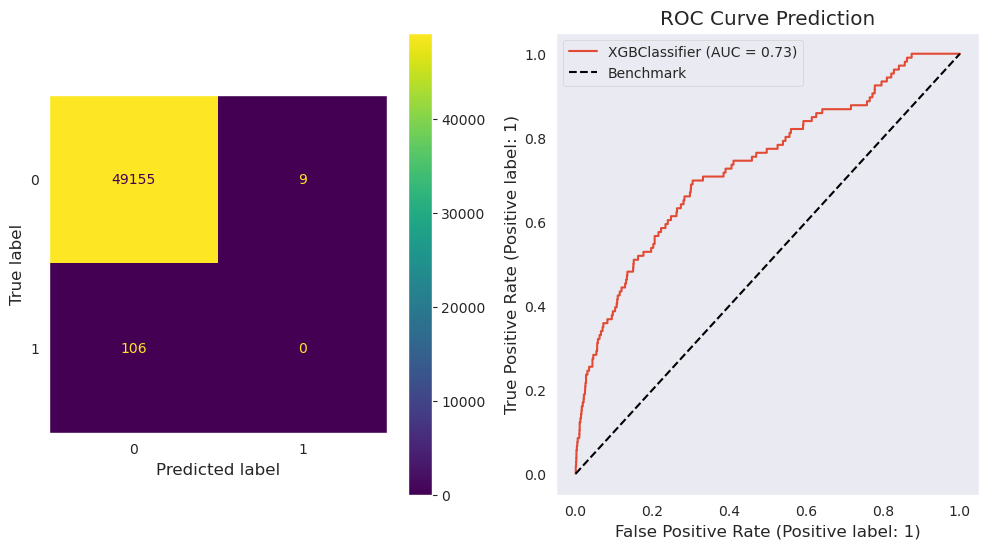

In [ ]:
plot_classification_metrics(xgb_cl,y_test,X_test)

Text(0.5, 1.0, 'Feature Importance')

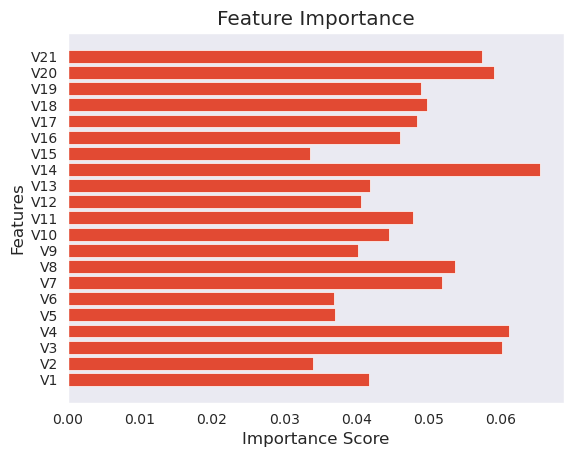

In [ ]:
feature_importance = xgb_cl.feature_importances_

plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), credit_aproval.iloc[:,:-1].columns)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')


## Using SMOTE 

In [ ]:
import xgboost as xgb    

# separar variáveis independentes da variável dependente
X = credit_aproval.drop('Class', axis=1)
y = credit_aproval['Class']

# dividir dados de treino e de teste

## stratify= y (para dividir de forma que as classes tenham a mesma proporção)
## random_state para que o resultado seja replicável
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    stratify=y, shuffle=True,
                                                    random_state=42)

In [ ]:
X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train, y_train)
smote_value_counts = y_train_smote.value_counts()
print("Fraudulent transactions are %.2f%% of the test set." % (smote_value_counts[0] * 100 / len(y_train_smote)))

Fraudulent transactions are 50.00% of the test set.


In [ ]:


xgb_cl = xgb.XGBClassifier(objective = "binary:logistic", n_estimators = 45, seed = 42, scale_pos_weight = 10)
avaliacao = [(X_train_smote, y_train_smote), (X_test, y_test)]

xgb_cl.fit(X_train, y_train, eval_metric = ["auc"], eval_set = avaliacao, verbose = True)
resultados_mod = xgb_cl.evals_result()

[0]	validation_0-auc:0.62176	validation_1-auc:0.55053


/home/eduardo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.64975	validation_1-auc:0.56336
[2]	validation_0-auc:0.67222	validation_1-auc:0.65110
[3]	validation_0-auc:0.67089	validation_1-auc:0.66389
[4]	validation_0-auc:0.74351	validation_1-auc:0.68231
[5]	validation_0-auc:0.74540	validation_1-auc:0.67178
[6]	validation_0-auc:0.75746	validation_1-auc:0.68238
[7]	validation_0-auc:0.81740	validation_1-auc:0.73467
[8]	validation_0-auc:0.83581	validation_1-auc:0.76457
[9]	validation_0-auc:0.84756	validation_1-auc:0.76897
[10]	validation_0-auc:0.85665	validation_1-auc:0.76253
[11]	validation_0-auc:0.86614	validation_1-auc:0.76451
[12]	validation_0-auc:0.87775	validation_1-auc:0.76098
[13]	validation_0-auc:0.88361	validation_1-auc:0.76432
[14]	validation_0-auc:0.89050	validation_1-auc:0.76953
[15]	validation_0-auc:0.89457	validation_1-auc:0.76841
[16]	validation_0-auc:0.90022	validation_1-auc:0.76204
[17]	validation_0-auc:0.90280	validation_1-auc:0.75938
[18]	validation_0-auc:0.90917	validation_1-auc:0.75455
[19]	validation_0-a

In [ ]:
# Prediçoes para o treinamento e teste

y_pred_train1 = xgb_cl.predict(X_train)
y_pred_test1 = xgb_cl.predict(X_test)

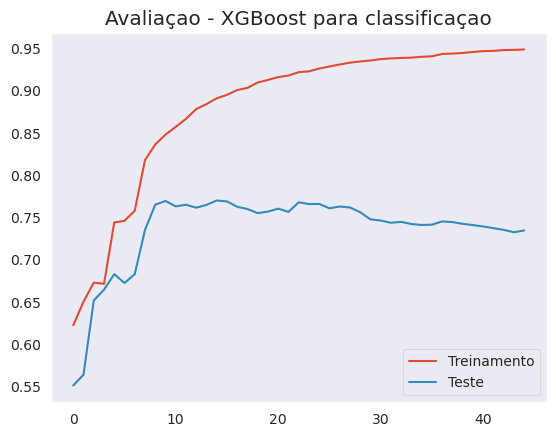

In [ ]:
# Verificando o grafico de avaliaçao

x = len(resultados_mod["validation_0"]["auc"])
X_axis = range(0, x)
fig, ax = plt.subplots()
ax.plot(X_axis, resultados_mod["validation_0"]["auc"], label = "Treinamento")
ax.plot(X_axis, resultados_mod["validation_1"]["auc"], label = "Teste")
plt.title("Avaliaçao - XGBoost para classificaçao");
plt.legend(loc = "lower right");

In [ ]:
train_metrics = get_metrics(xgb_cl,y_train,X_train)
test_metrics = get_metrics(xgb_cl,y_test,X_test)

In [ ]:
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  1.0
Accuracy  - Test :  0.9977
----------------------------------------------------------------------------------------------------
Precision  - Train :  1.0
Precision  - Test :  0.0
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.996
Recall  - Test :  0.0
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.998
F1-Score  - Test :  0.0
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  1.0
Area Under the Curve  - Test :  0.7341
----------------------------------------------------------------------------------------------------
Gini  - Train :  1.0
Gini  - Test :  0.47
----------------------------------------------------------------------------------------------------


## Hyperparameter tunning

In [ ]:
import xgboost as xgb    

# separar variáveis independentes da variável dependente
X = credit_aproval.drop('Class', axis=1)
y = credit_aproval['Class']

# dividir dados de treino e de teste

## stratify= y (para dividir de forma que as classes tenham a mesma proporção)
## random_state para que o resultado seja replicável
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    stratify=y, shuffle=True,
                                                    random_state=42)

In [ ]:
xgboost1 = xgb.XGBClassifier(
                            learning_rate =0.1,
                            n_estimators=1000,
                            max_depth=5,
                            min_child_weight=1,
                            gamma=0,
                            subsample=0.8,
                            colsample_bytree=0.8,
                            objective= 'binary:logistic',
                            nthread=4,
                            scale_pos_weight=1,
                            seed=42)

strat_kfold = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

param_test1 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}


gsearch1 = GridSearchCV(estimator = xgboost1, param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=strat_kfold)

In [ ]:
#gsearch1.fit(X_train,y_train)

## Ajustando os parametros

In [133]:

class_ratio = np.sum(y_train == 0) / np.sum(y_train == 1)

# Set the scale_pos_weight parameter
scale_pos_weight = class_ratio

params_v2 = {
    'objective': 'binary:logistic',
    'gamma': 0.6,
    'learning_rate': 0.001,
    'max_depth': 3,
    'min_child_weight': 7,
    'scale_pos_weight': scale_pos_weight,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'eval_metric': 'auc',
    'seed' : 42
}

xgboost_v2 = xgb.XGBClassifier(**params_v2)
xgboost_v2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.6, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [134]:
avaliacao = [(X_train, y_train), (X_test, y_test)]

xgboost_v2.fit(X_train, y_train ,eval_set = avaliacao, verbose = True)
resultados_mod = xgboost_v2.evals_result()

[0]	validation_0-auc:0.71082	validation_1-auc:0.66938
[1]	validation_0-auc:0.78331	validation_1-auc:0.73622
[2]	validation_0-auc:0.81860	validation_1-auc:0.74510
[3]	validation_0-auc:0.83382	validation_1-auc:0.74870
[4]	validation_0-auc:0.84168	validation_1-auc:0.76505
[5]	validation_0-auc:0.84016	validation_1-auc:0.76767
[6]	validation_0-auc:0.84992	validation_1-auc:0.77972
[7]	validation_0-auc:0.85573	validation_1-auc:0.78319
[8]	validation_0-auc:0.85387	validation_1-auc:0.77227
[9]	validation_0-auc:0.85400	validation_1-auc:0.77229
[10]	validation_0-auc:0.85702	validation_1-auc:0.76578
[11]	validation_0-auc:0.85826	validation_1-auc:0.76897
[12]	validation_0-auc:0.85830	validation_1-auc:0.77248
[13]	validation_0-auc:0.85916	validation_1-auc:0.77646
[14]	validation_0-auc:0.86064	validation_1-auc:0.77153
[15]	validation_0-auc:0.86480	validation_1-auc:0.77412
[16]	validation_0-auc:0.86866	validation_1-auc:0.77810
[17]	validation_0-auc:0.86979	validation_1-auc:0.78009
[18]	validation_0-au

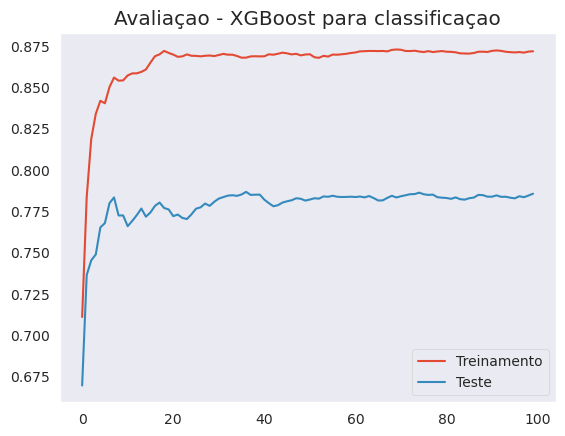

In [135]:
# Prediçoes para o treinamento e teste

y_pred_train2 = xgboost_v2.predict(X_train)
y_pred_test2 = xgboost_v2.predict(X_test)

# Verificando o grafico de avaliaçao

x = len(resultados_mod["validation_0"]["auc"])
X_axis = range(0, x)
fig, ax = plt.subplots()
ax.plot(X_axis, resultados_mod["validation_0"]["auc"], label = "Treinamento")
ax.plot(X_axis, resultados_mod["validation_1"]["auc"], label = "Teste")
plt.title("Avaliaçao - XGBoost para classificaçao");
plt.legend(loc = "lower right");

In [136]:
train_metrics = get_metrics(xgboost_v2,y_train,X_train)
test_metrics = get_metrics(xgboost_v2,y_test,X_test)
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  0.9311
Accuracy  - Test :  0.9303
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.0175
Precision  - Test :  0.0129
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.5628
Recall  - Test :  0.4151
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.0339
F1-Score  - Test :  0.025
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.8716
Area Under the Curve  - Test :  0.7854
----------------------------------------------------------------------------------------------------
Gini  - Train :  0.74
Gini  - Test :  0.57
----------------------------------------------------------------------------------------------------


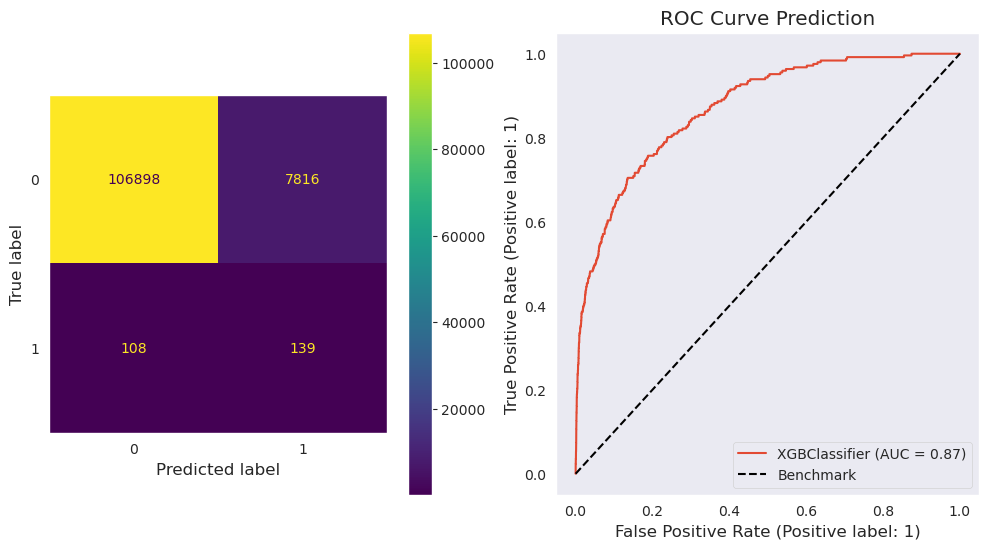

In [137]:
plot_classification_metrics(xgboost_v2,y_train,X_train)

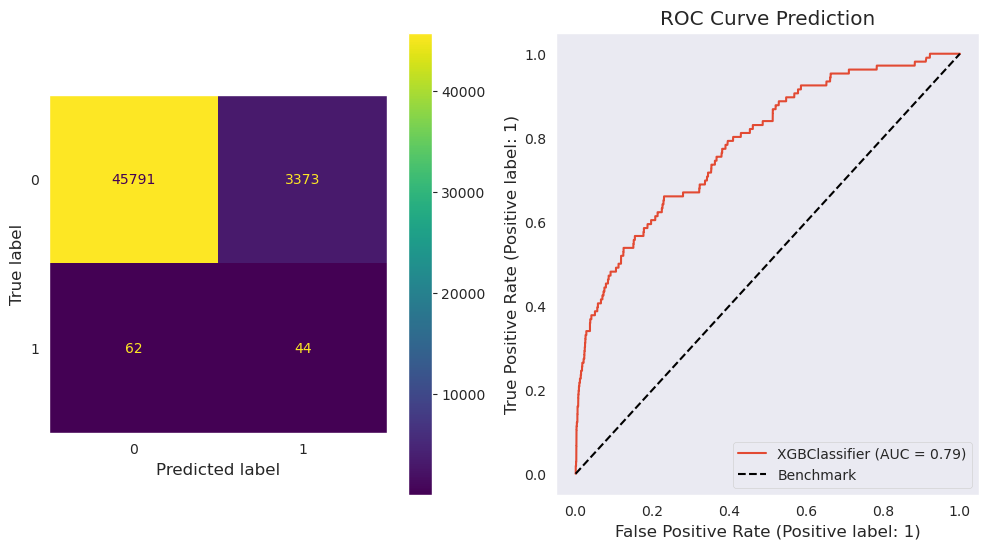

In [138]:
plot_classification_metrics(xgboost_v2,y_test,X_test)

## Ajustando parâmetros com SMOTE

In [139]:
X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train, y_train)
smote_value_counts = y_train_smote.value_counts()
print("Fraudulent transactions are %.2f%% of the test set." % (smote_value_counts[0] * 100 / len(y_train_smote)))

Fraudulent transactions are 50.00% of the test set.


In [141]:
class_ratio = np.sum(y_train_smote == 0) / np.sum(y_train_smote == 1)

# Set the scale_pos_weight parameter
scale_pos_weight = class_ratio


params_v3 = {
    'objective': 'binary:logistic',
    'gamma': 0,
    'learning_rate': 0.5,
    'max_depth': 7,
    'min_child_weight': 3,
    'scale_pos_weight': scale_pos_weight,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'auc',
    'seed':42
}

xgboost_smote = xgb.XGBClassifier(**params_v3)
xgboost_smote.fit(X_train_smote, y_train_smote)

avaliacao = [(X_train_smote, y_train_smote), (X_test, y_test)]

xgboost_smote.fit(X_train_smote, y_train_smote ,eval_set = avaliacao, verbose = True)
resultados_mod = xgboost_smote.evals_result()

[0]	validation_0-auc:0.87211	validation_1-auc:0.65643
[1]	validation_0-auc:0.93310	validation_1-auc:0.67040
[2]	validation_0-auc:0.94661	validation_1-auc:0.69347
[3]	validation_0-auc:0.95737	validation_1-auc:0.71908
[4]	validation_0-auc:0.96595	validation_1-auc:0.71681
[5]	validation_0-auc:0.97344	validation_1-auc:0.72313
[6]	validation_0-auc:0.97878	validation_1-auc:0.70515
[7]	validation_0-auc:0.98226	validation_1-auc:0.71781
[8]	validation_0-auc:0.98400	validation_1-auc:0.72184
[9]	validation_0-auc:0.98540	validation_1-auc:0.70962
[10]	validation_0-auc:0.98784	validation_1-auc:0.70106
[11]	validation_0-auc:0.98876	validation_1-auc:0.69002
[12]	validation_0-auc:0.98941	validation_1-auc:0.68685
[13]	validation_0-auc:0.99012	validation_1-auc:0.68370
[14]	validation_0-auc:0.99168	validation_1-auc:0.68559
[15]	validation_0-auc:0.99268	validation_1-auc:0.68102
[16]	validation_0-auc:0.99411	validation_1-auc:0.67010
[17]	validation_0-auc:0.99488	validation_1-auc:0.66976
[18]	validation_0-au

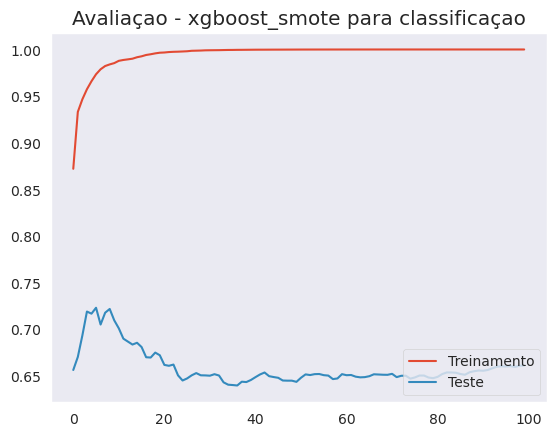

In [142]:
# Prediçoes para o treinamento e teste

y_pred_train3 = xgboost_smote.predict(X_train)
y_pred_test3 = xgboost_smote.predict(X_test)

# Verificando o grafico de avaliaçao

x = len(resultados_mod["validation_0"]["auc"])
X_axis = range(0, x)
fig, ax = plt.subplots()
ax.plot(X_axis, resultados_mod["validation_0"]["auc"], label = "Treinamento")
ax.plot(X_axis, resultados_mod["validation_1"]["auc"], label = "Teste")
plt.title("Avaliaçao - xgboost_smote para classificaçao");
plt.legend(loc = "lower right");

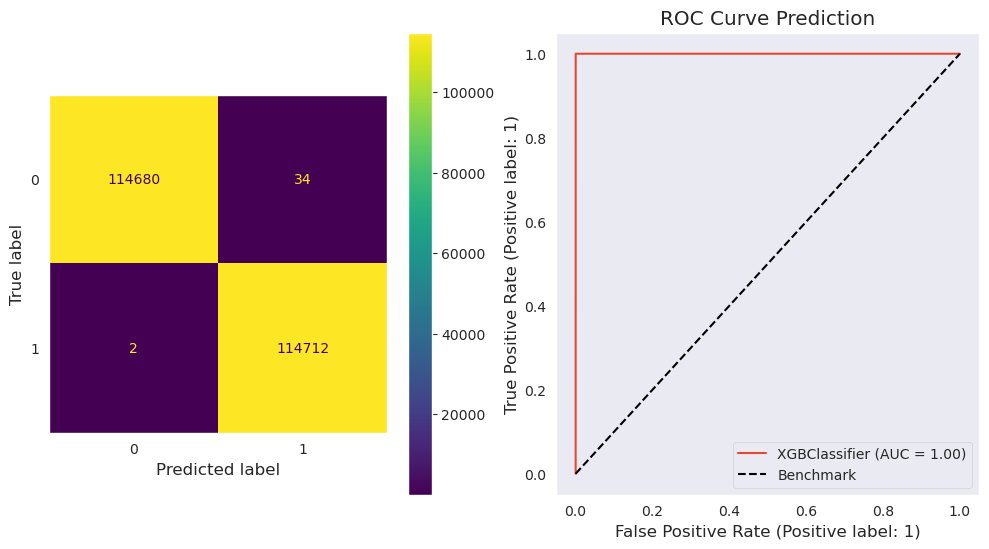

In [143]:
plot_classification_metrics(xgboost_smote,y_train_smote,X_train_smote)

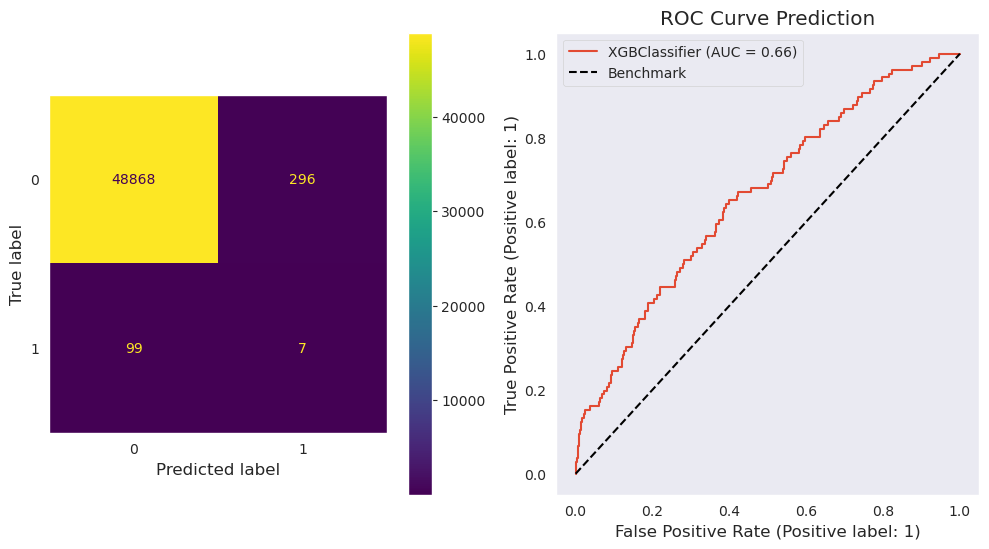

In [144]:
plot_classification_metrics(xgboost_smote,y_test,X_test)